# IEEE-CIS Fraud Detection
## Can you detect fraud from customer transactions?

In [41]:
# Análise dos dados
import pandas as pd

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sn

### SampleSubmission é o formato de entrega do modelo. Desconsiderar Dataset.

In [2]:
df_SampleSubmission = pd.read_csv('sample_submission.csv')

In [3]:
df_SampleSubmission.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


### Analisando o dataset test_identity.csv

Metadados
Identity Table
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id_12 - id_38

DeviceInfo : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#583227

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

In [4]:
df_test_identity = pd.read_csv('test_identity.csv')

In [5]:
l, c = df_test_identity.shape

In [6]:
l

141907

In [7]:
df_test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [8]:
df_test_identity.tail()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
141902,4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,...,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
141905,4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
141906,4170239,-10.0,692090.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG


In [9]:
df_test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

In [10]:
df_test_identity.isnull().sum().sort_values(ascending=False)

id-24            137167
id-25            136868
id-26            136860
id-21            136848
id-07            136848
id-08            136848
id-23            136845
id-22            136845
id-27            136845
id-18             91032
id-03             75426
id-04             75426
id-30             71248
id-32             71236
id-33             71236
id-14             70550
id-34             69732
id-10             67569
id-09             67569
DeviceInfo        26850
id-16             16160
id-13             11621
id-06              7157
id-05              7157
id-20              6274
id-19              6001
id-17              5941
id-31              5282
id-28              5129
id-29              5129
id-11              5129
DeviceType         4976
id-02              4931
id-15              4930
id-35              4930
id-36              4930
id-37              4930
id-38              4930
id-01                 0
id-12                 0
TransactionID         0
dtype: int64

In [11]:
(df_test_identity.isnull().sum().sort_values(ascending=False) / l) * 100

id-24            96.659784
id-25            96.449083
id-26            96.443445
id-21            96.434989
id-07            96.434989
id-08            96.434989
id-23            96.432875
id-22            96.432875
id-27            96.432875
id-18            64.149055
id-03            53.151712
id-04            53.151712
id-30            50.207530
id-32            50.199074
id-33            50.199074
id-14            49.715659
id-34            49.139225
id-10            47.614987
id-09            47.614987
DeviceInfo       18.920843
id-16            11.387740
id-13             8.189166
id-06             5.043444
id-05             5.043444
id-20             4.421205
id-19             4.228826
id-17             4.186545
id-31             3.722156
id-28             3.614339
id-29             3.614339
id-11             3.614339
DeviceType        3.506522
id-02             3.474811
id-15             3.474106
id-35             3.474106
id-36             3.474106
id-37             3.474106
i

In [12]:
df_test_identity_corr = df_test_identity.corr()

<AxesSubplot:>

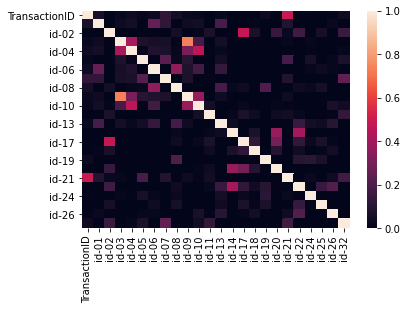

In [13]:
sn.heatmap(df_test_identity_corr, vmin=0, vmax=1)

### Analisando o dataset test_transaction.csv

Transaction table
“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”
dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

In [15]:
df_test_transaction = pd.read_csv('test_transaction.csv')

In [16]:
display(df_test_transaction)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
l2, c2 = df_test_transaction.shape

In [44]:
df_test_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 393 columns):
 #    Column          Dtype  
---   ------          -----  
 0    TransactionID   int64  
 1    TransactionDT   int64  
 2    TransactionAmt  float64
 3    ProductCD       object 
 4    card1           int64  
 5    card2           float64
 6    card3           float64
 7    card4           object 
 8    card5           float64
 9    card6           object 
 10   addr1           float64
 11   addr2           float64
 12   dist1           float64
 13   dist2           float64
 14   P_emaildomain   object 
 15   R_emaildomain   object 
 16   C1              float64
 17   C2              float64
 18   C3              float64
 19   C4              float64
 20   C5              float64
 21   C6              float64
 22   C7              float64
 23   C8              float64
 24   C9              float64
 25   C10             float64
 26   C11             float64
 27   C12         

In [24]:
# Para visualizar todas as colunas (antes de conhecer o atributo 'verbose'), criei uma Serie com o nome das colunas
df_test_transactionColumns = pd.Series(df_test_transaction.columns)

In [45]:
df_test_transactionColumns

0       TransactionID
1       TransactionDT
2      TransactionAmt
3           ProductCD
4               card1
            ...      
388              V335
389              V336
390              V337
391              V338
392              V339
Length: 393, dtype: object

In [31]:
# A ideia era expandir as colunas ao máximo, pois ao visualizar a serie acima os dados permaneceram truncados
pd.set_option('display.max_columns', None)

In [34]:
# Dai lembrei do Método unique
df_test_transactionColumns.unique()

array(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1',
       'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68',
       

In [46]:
df_test_transaction.isnull().sum().sort_values(ascending=False)

dist2            470255
D7               446558
D12              437437
D8               432353
D9               432353
                  ...  
V110                  0
V111                  0
V112                  0
V113                  0
TransactionID         0
Length: 393, dtype: int64

In [35]:
df_test_transaction_corr = df_test_transaction.corr()

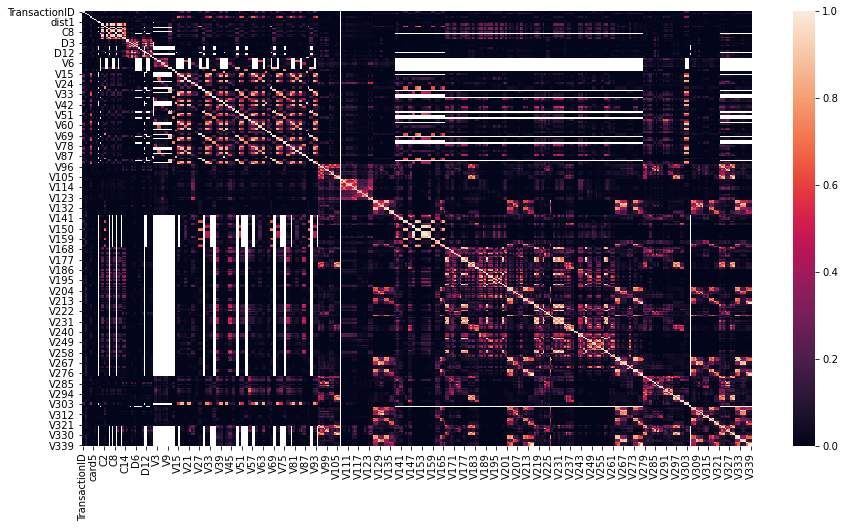

In [42]:
# Tá o caos
plt.figure(figsize=(15,8))
sn.heatmap(df_test_transaction_corr, vmin=0, vmax=1)
plt.show()